<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/Compare%20MLP%20vs%20CNN/mnist/mnist_mlp_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
wandb.init(project= "MLP mnist")

In [ ]:
config = wandb.config
config.learning_rate = 0.01
# learning_rate = 0.01

In [ ]:
(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.mnist.load_data()
# Y_train.reshape(-1, 1)

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0 , X_test / 255.0

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, shuffle=True)

### MLP Model

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28, 28)),
      #  Dense(128, activation="relu"),
       Dense(64, activation="relu"),
       Dense(32, activation="relu"),
       Dense(10, activation="softmax")                                     
])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [ ]:
model.fit(X_train, Y_train, epochs= 50, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/50
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3095 - accuracy: 0.9103 - val_loss: 0.1859 - val_accuracy: 0.9485 - _timestamp: 1647175641.0000 - _runtime: 8612.0000
Epoch 2/50
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1913 - accuracy: 0.9492 - val_loss: 0.2277 - val_accuracy: 0.9427 - _timestamp: 1647175644.0000 - _runtime: 8615.0000
Epoch 3/50
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1641 - accuracy: 0.9573 - val_loss: 0.1738 - val_accuracy: 0.9552 - _timestamp: 1647175647.0000 - _runtime: 8618.0000
Epoch 4/50
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1397 - accuracy: 0.9646 - val_loss: 0.2204 - val_accuracy: 0.9479 - _timestamp: 1647175650.0000 - _runtime: 8621.0000
Epoch 5/50
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9676 - val_loss: 0.1923 - val_accuracy: 0.9546 - _timestamp: 1647175653.0000 - _runtime: 8624.0000
Epoch 6/50
1407/1407

## Test

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.9592


[0.5597330331802368, 0.9592000246047974]

In [ ]:
model.save('mlp-mnist.h5')

## CNN Model

In [ ]:
model = tf.keras.models.Sequential([
      layers.Conv2D(64, (3, 3), input_shape=(28,28, 1), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (5, 5), activation='relu'),
      layers.Flatten(),
      
      Dense(48, activation='relu'),
      Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [ ]:
model_history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1968 - accuracy: 0.9409 - val_loss: 0.0972 - val_accuracy: 0.9729 - _timestamp: 1648272248.0000 - _runtime: 2687.0000
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1055 - accuracy: 0.9707 - val_loss: 0.1215 - val_accuracy: 0.9676 - _timestamp: 1648272254.0000 - _runtime: 2693.0000
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0958 - accuracy: 0.9748 - val_loss: 0.1688 - val_accuracy: 0.9589 - _timestamp: 1648272261.0000 - _runtime: 2700.0000
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0905 - accuracy: 0.9766 - val_loss: 0.0875 - val_accuracy: 0.9780 - _timestamp: 1648272267.0000 - _runtime: 2706.0000
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0803 - accuracy: 0.9797 - val_loss: 0.0834 - val_accuracy: 0.9795 - _timestamp: 1648272272.0000 - _runtime: 2711.0000
Epoch 6/10
1407/1407

In [ ]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1420 - accuracy: 0.9801


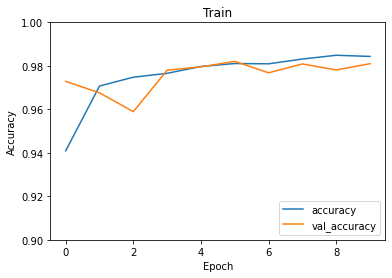

In [ ]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')



In [ ]:
model.save('cnn-mlp-mnist.h5')